In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [6,4]

import time

from sklearn import preprocessing, metrics, model_selection
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv(DATOS_DIR + 'iris.csv')
nomClases = pd.unique(df['class'])

df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
Y = np.array(df.iloc[:,-1])

In [5]:
print(X[:10,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(Y[:10])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [7]:
entradas = X.shape[1]
ocultas = 2

#-- la red tendrá una salida para cada tipo de flor
salidas = len(np.unique(Y))
print("entradas = %d ; salidas = %d" % (entradas, salidas))

entradas = 4 ; salidas = 3


In [8]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X,Y, test_size=0.30)#, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    

In [9]:
Y_train[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [10]:
clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(2,), random_state=1,
                    max_iter=2000, batch_size = 20,
                    tol=1.0e-05, n_iter_no_change = 30, 
                    early_stopping=False, verbose=False, 
                    activation='tanh')

print("Inicio ...")
tIni = time.time()

history = clf.fit(X_train,Y_train)

tFin = time.time()
print("duración %.7f seg" % (tFin- tIni))

Inicio ...
duración 0.2275357 seg


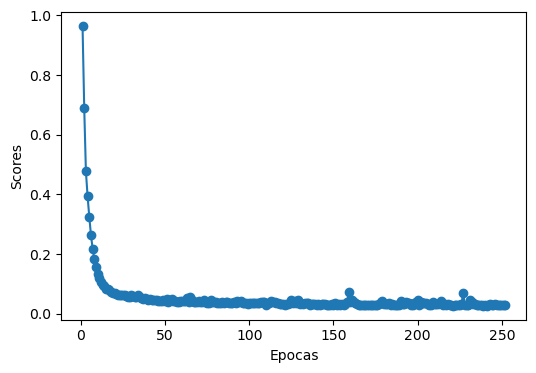

In [11]:
plt.plot(range(1, len(history.loss_curve_) + 1), history.loss_curve_, marker='o')
# plt.plot(range(1, len(history.validation_scores_) + 1), history.validation_scores_, marker='*')

plt.xlabel('Epocas')
plt.ylabel('Scores')
plt.show()

In [12]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))

% aciertos X_train : 0.990


In [13]:
Y_pred[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [14]:
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report) 

Confusion matrix Training:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      0.97      0.99        36
 Iris-virginica       0.97      1.00      0.99        38

       accuracy                           0.99       105
      macro avg       0.99      0.99      0.99       105
   weighted avg       0.99      0.99      0.99       105



In [15]:
MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM)

Confusion matrix:
[[31  0  0]
 [ 0 35  1]
 [ 0  0 38]]


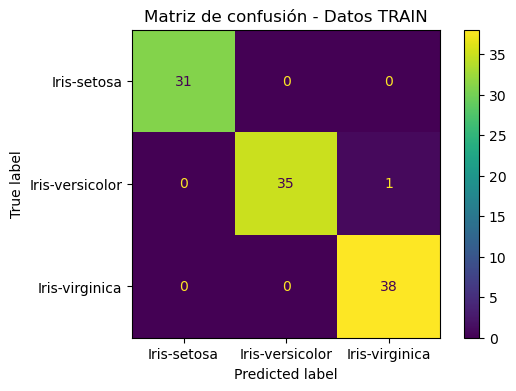

In [16]:
fig=metrics.ConfusionMatrixDisplay.from_estimator(clf, X_train, Y_train)
plt.title("Matriz de confusión - Datos TRAIN") 
plt.show()

% aciertos X_test : 0.978

Confusion matrix Test:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix:
[[19  0  0]
 [ 0 14  0]
 [ 0  1 11]]


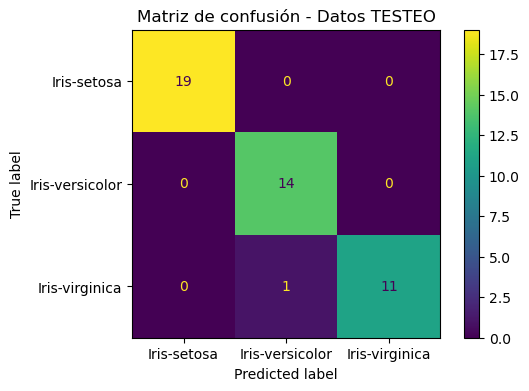

In [17]:
# -- TESTING ---
Y_pred= clf.predict(X_test)
print("%% aciertos X_test : %.3f\n" % metrics.accuracy_score(Y_test,Y_pred))

report = metrics.classification_report(Y_test, Y_pred)
print("Confusion matrix Test:\n%s" % report) 

MM = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n%s" % MM)

fig=metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test)  
plt.title("Matriz de confusión - Datos TESTEO")
plt.show()